In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')
np.seterr(all='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
col_names = ['user_id', 'item_id', 'rating', 'timestamp']
ratings_df = pd.read_csv(r'datasets/ml-latest-small/ratings.csv', sep=',', header=1, names=col_names)
ratings_df.head()

,user_id,item_id,rating,timestamp
0,1,3,4.0,964981247
1,1,6,4.0,964982224
2,1,47,5.0,964983815
3,1,50,5.0,964982931
4,1,70,3.0,964982400


In [3]:
print("Raw data size: ", ratings_df.shape,
    "\nNumber of Unique users: ", len(ratings_df['user_id'].unique()),
    "\nNumber of Unique movies: ", len(ratings_df['item_id'].unique()),
    "\nNumber of Unique ratings: ", len(ratings_df['rating'].unique()),     # 0, 0.5, 1, 1.5, ... 5.0
    "\nUnique ratings: ", ratings_df['rating'].sort_values().unique(),
     )

Raw data size:  (100835, 4) 
Number of Unique users:  610 
Number of Unique movies:  9724 
Number of Unique ratings:  10 
Unique ratings:  [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


In [4]:
col_names = ['item_id', 'title', 'genres']
titles_df = pd.read_csv(r'datasets/ml-latest-small/movies.csv', sep=',', header=0, names=col_names)
titles_df.head()

,item_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movie_ratings = pd.merge(ratings_df, titles_df,on='item_id')
movie_ratings.head()

,user_id,item_id,rating,timestamp,title,genres
0,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
1,6,3,5.0,845554296,Grumpier Old Men (1995),Comedy|Romance
2,19,3,3.0,965707636,Grumpier Old Men (1995),Comedy|Romance
3,32,3,3.0,856736172,Grumpier Old Men (1995),Comedy|Romance
4,42,3,4.0,996221045,Grumpier Old Men (1995),Comedy|Romance


In [6]:
movie_ratings.groupby('title')['rating'].count().sort_values(ascending=False).head(20)

title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
Star Wars: Episode IV - A New Hope (1977)                                         251
Jurassic Park (1993)                                                              238
Braveheart (1995)                                                                 237
Terminator 2: Judgment Day (1991)                                                 224
Schindler's List (1993)                                                           220
Fight Club (1999)                                                                 218
Toy Story (1995)                                

In [7]:
ratings = pd.DataFrame(movie_ratings.groupby('title')['rating'].mean())
ratings['No_of_ratings'] = pd.DataFrame(movie_ratings.groupby('title')['rating'].count())
ratings.sort_values(by=['No_of_ratings'], ascending=False).head(10)

,rating,No_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [8]:
def show_hist(df,title,xlabel,ylabel,figsize=(12,8),bins=8, fontsize=15, color='#0504aa'):
    plt.figure(figsize=figsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.title(title, fontsize=fontsize)
    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.grid(alpha=0)
    plt.hist(x=df, bins=bins, color=color, alpha=0.7, rwidth=0.95)
    plt.show()

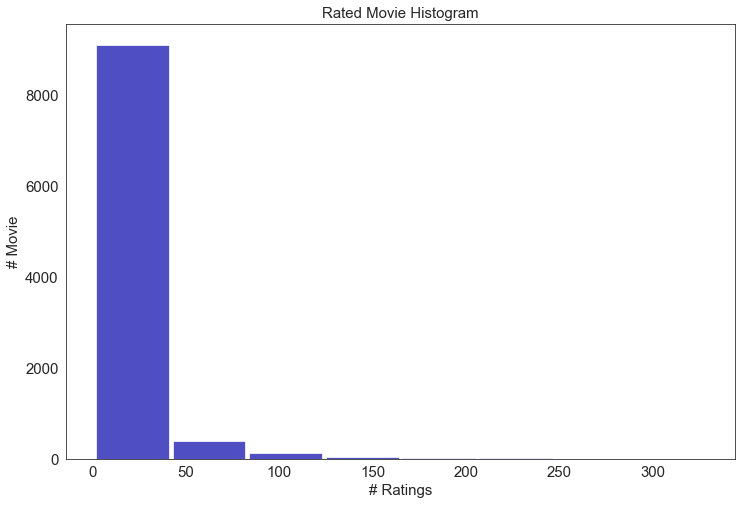

In [9]:
show_hist(ratings['No_of_ratings'],'Rated Movie Histogram', '# Ratings', '# Movie' )

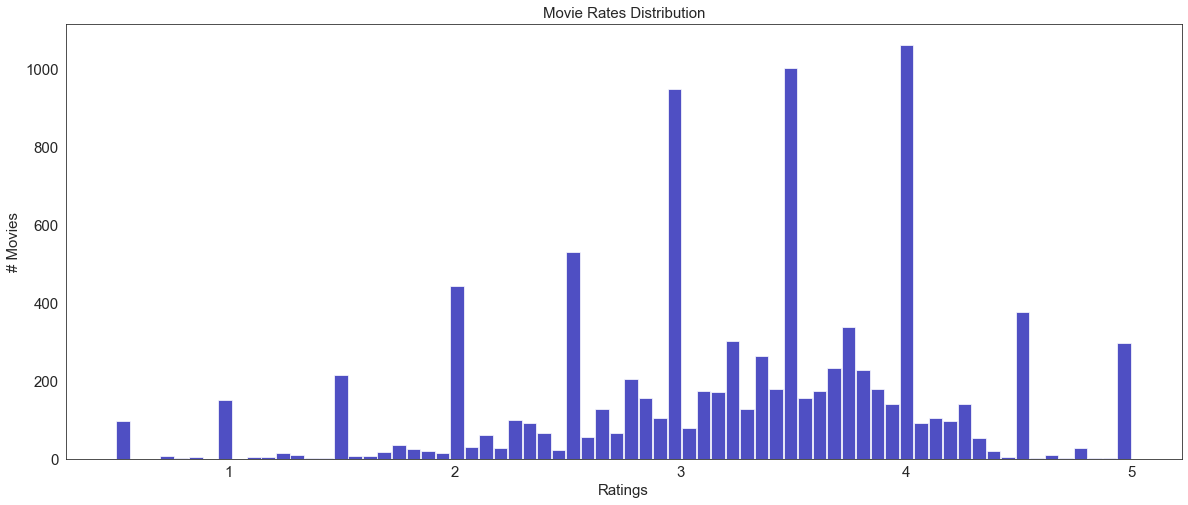

In [10]:
show_hist(ratings['rating'], 'Movie Rates Distribution', 'Ratings', '# Movies',figsize=(20,8), bins=70)

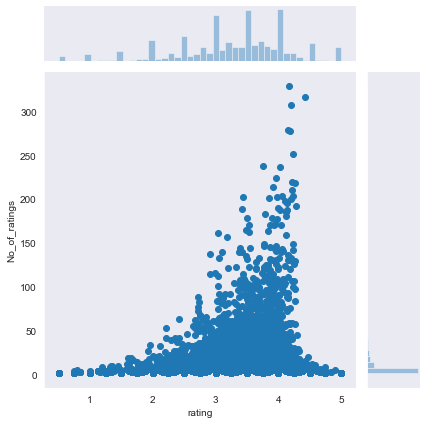

In [11]:
sns.set_style('dark')
sns.jointplot(x='rating', y='No_of_ratings', data=ratings)

In [12]:
user_movie_matrix = movie_ratings.pivot_table(index='user_id', columns='title', values='rating')

In [13]:
user_movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
ratings.sort_values('No_of_ratings', ascending=False).head(10)

,rating,No_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [15]:
matrix_movie_ratings = user_movie_matrix['Matrix, The (1999)']
matrix_movie_ratings.dropna(inplace=True)   # Remove users that have not given any rating
matrix_movie_ratings.head()

user_id
1     5.0
4     1.0
10    0.5
13    5.0
15    4.0
Name: Matrix, The (1999), dtype: float64

In [17]:
# Retrieve all movies related to matrix
movies_like_the_matrix = user_movie_matrix.corrwith(matrix_movie_ratings)

In [18]:
# Create a DataFrame that contains movies and correlation
corr_the_matrix = pd.DataFrame(movies_like_the_matrix, columns=['Correlation'])
# Drop all NA values
corr_the_matrix.dropna(inplace=True)
corr_the_matrix.head()

,Correlation
title,
"'burbs, The (1989)",-0.160843
(500) Days of Summer (2009),0.302316
*batteries not included (1987),0.392232
...And Justice for All (1979),0.654654
10 Cent Pistol (2015),-1.000000


In [19]:
corr_the_matrix = corr_the_matrix.join(ratings['No_of_ratings'])
corr_the_matrix.head()

,Correlation,No_of_ratings
title,,
"'burbs, The (1989)",-0.160843,17
(500) Days of Summer (2009),0.302316,42
*batteries not included (1987),0.392232,7
...And Justice for All (1979),0.654654,3
10 Cent Pistol (2015),-1.000000,2


In [21]:
# In order to increase confidence interval, only take movies with more than 20 ratings
corr_the_matrix = corr_the_matrix[corr_the_matrix['No_of_ratings'] > 20]
corr_the_matrix.head()

,Correlation,No_of_ratings
title,,
(500) Days of Summer (2009),0.302316,42
10 Things I Hate About You (1999),0.166496,54
101 Dalmatians (1996),0.172258,47
101 Dalmatians (One Hundred and One Dalmatians) (1961),-0.019070,44
12 Angry Men (1957),0.021081,57


R<sup>2</sup> is the percentage of variation explained by the relationship between two variables

In this case R<sup>2</sup> shows the percentage of the relationship between two movies.

[Learn More about R<sup>2</sup>](https://www.youtube.com/watch?v=2AQKmw14mHM)

In [23]:
# Take the square of R which is the correlation
corr_the_matrix['R_Square'] = np.square(corr_the_matrix['Correlation']) 

# Show as Percantage
corr_the_matrix['Similarity'] = np.multiply(corr_the_matrix['R_Square'], 100)
corr_the_matrix['Similarity'] = np.multiply(corr_the_matrix['Similarity'], np.sign(corr_the_matrix['Correlation'])) 
similarity_df = pd.DataFrame(corr_the_matrix, columns=['Correlation', 'No_of_ratings', 'R_Square', 'Similarity'])
similarity_df['Similarity']= similarity_df['Similarity'].map('{:,.2f}%'.format)
similarity_df.head()

,Correlation,No_of_ratings,R_Square,Similarity
title,,,,
(500) Days of Summer (2009),0.302316,42,0.091395,9.14%
10 Things I Hate About You (1999),0.166496,54,0.027721,2.77%
101 Dalmatians (1996),0.172258,47,0.029673,2.97%
101 Dalmatians (One Hundred and One Dalmatians) (1961),-0.019070,44,0.000364,-0.04%
12 Angry Men (1957),0.021081,57,0.000444,0.04%


In [28]:
similarity_df.sort_values('Correlation', ascending=False).head(20)

,Correlation,No_of_ratings,R_Square,Similarity
title,,,,
"Matrix, The (1999)",1.000000,278,1.000000,100.00%
Wyatt Earp (1994),0.859338,21,0.738462,73.85%
"Cabin in the Woods, The (2012)",0.795494,22,0.632811,63.28%
Zootopia (2016),0.760610,32,0.578528,57.85%
Life of Pi (2012),0.710196,31,0.504379,50.44%
Milk Money (1994),0.704068,22,0.495712,49.57%
1408 (2007),0.702785,25,0.493907,49.39%
X-Men: Days of Future Past (2014),0.695681,30,0.483972,48.40%
Tarzan (1999),0.680988,24,0.463744,46.37%
